In [2]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from knutils.structural import shearframe
from beef import newmark

# from jupyterthemes import jtplot

# currently installed theme will be used to
# set plot style if no arguments provided
# jtplot.style(theme='default', gridlines='--', figsize=(8, 6), context='talk', fscale=1.25)

In [9]:
# Define shear frame 3 levels, k=10, c=0, m=1
K, C, M, __ = shearframe(2, 10, 0.0, 1)

print(K)

# Eigenvalue solution for reference
d,__ = np.linalg.eig(np.linalg.inv(M) @ K)
omega = np.sort(np.sqrt(d))
omega_1 = min(omega)
print(omega_1)
T = 2*np.pi/omega

# Simulation settings
n_periods = 10
samples_per_load_period = 50
nmfactors = newmark.factors('constant')
beta, gamma = nmfactors['beta'], nmfactors['gamma']

[[ 10. -10.]
 [-10.  20.]]
1.9543950758485478


In [10]:
# DOF defintions (load, freq and response)
load_dof = 1
freq_dof = 0
response_dof = 0

# Construct force history
t = np.arange(0, T[freq_dof]*n_periods, T[freq_dof]/samples_per_load_period)
f = np.zeros([M.shape[0], len(t)])
# f[load_dof, :] = np.linspace(0, 1000, len(t)) # Either this
f[load_dof, :] = np.sin(omega[freq_dof]*t)   # or this

# Define initial conditions (at rest)
u0 = f[:, 0]*0
udot0 = f[:, 0]*0

In [14]:
# Run different versions of Newmark simulation
u, udot, uddot = newmark.newmark_lin(K, C, M, f, t, u0, udot0, beta=beta, gamma=gamma, solver='full')
u_lin, udot_lin, uddot_lin = newmark.newmark_lin(K, C, M, f, t, u0, udot0, beta=beta, gamma=gamma, solver='lin')
u_lin2, udot_lin2, uddot_lin2 = newmark.newmark_lin(K, C, M, f, t, u0, udot0, beta=beta, gamma=gamma, solver='lin_alt')

u_stat = u*0
for k in range(0, f.shape[1]):
    u_stat[:, k] = np.linalg.inv(K) @ f[:, k]


0.012984266229483196


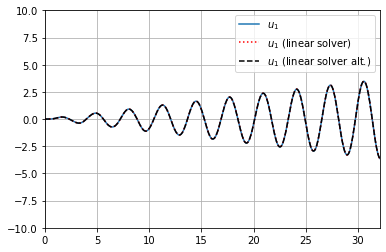

In [15]:
# Plot results
fig = plt.figure(1)
fig.clf()

plt.plot(t, u[response_dof, :], label=f'$u_{response_dof+1}$')
plt.plot(t, u_lin[response_dof, :], label=f'$u_{response_dof+1}$ (linear solver)', linestyle= ':', color='Red')
plt.plot(t, u_lin2[response_dof, :], label=f'$u_{response_dof+1}$ (linear solver alt.)', linestyle='--', markersize=8, markevery=5, color='Black', alpha=1)
# plt.plot(t, u_stat[response_dof, :], label=f'$u_{response_dof+1}$ (static)', linestyle=':', color='Green', alpha=1)
plt.legend()
plt.xlim(left=0, right=max(t))
plt.ylim([-10,10])
plt.grid('on')
print(u[response_dof, 10])